<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/FastViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

Cloning into 'Project_DS'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 323 (delta 38), reused 9 (delta 9), pack-reused 268 (from 2)
Receiving objects: 100% (323/323), 25.11 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks
import numpy as np, joblib
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models
import xgboost as xgb
import lightgbm as lgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support
import json
import numpy as np

In [3]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [4]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [5]:
# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 6, 222)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 6, 64)     │     14,272 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 6, 64)     │     66,368 │ dense[0][0],      │
│ (MultiHeadAttentio… │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 6, 64)     │          0 │ dense[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 6, 64)     │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 6, 128)    │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 6, 128)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 6, 64)     │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 6, 64)     │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 6, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 64)     │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 6, 64)     │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 6, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 64)     │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 6, 128)    │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 6, 128)    │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 6, 64)     │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 6, 64)     │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 6, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 64)     │        128 │ add_3[0][0]     

 Total params: 181,842 (710.32 KB)

 Trainable params: 181,842 (710.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6645 - loss: 1.1318 - val_accuracy: 0.7462 - val_loss: 0.6104
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7675 - loss: 0.6339 - val_accuracy: 0.8122 - val_loss: 0.4737
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8047 - loss: 0.5199 - val_accuracy: 0.8206 - val_loss: 0.4432
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8372 - loss: 0.4302 - val_accuracy: 0.8545 - val_loss: 0.3628
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8533 - loss: 0.3938 - val_accuracy: 0.8528 - val_loss: 0.3416
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8643 - loss: 0.3549 - val_accuracy: 0.8511 - val_loss: 0.3638
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8662 - loss: 0.3443 - val_accuracy: 0.8714 - val_loss: 0.3308
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8553 - loss: 0.3603 - val_a

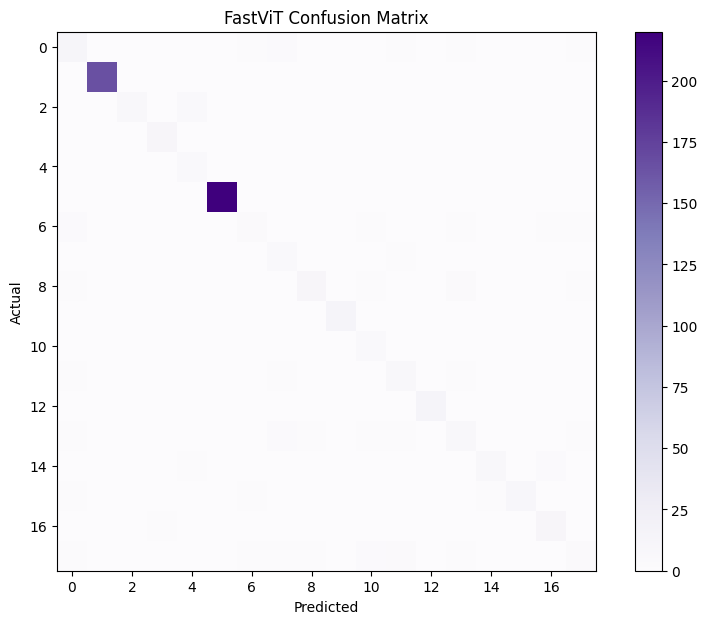

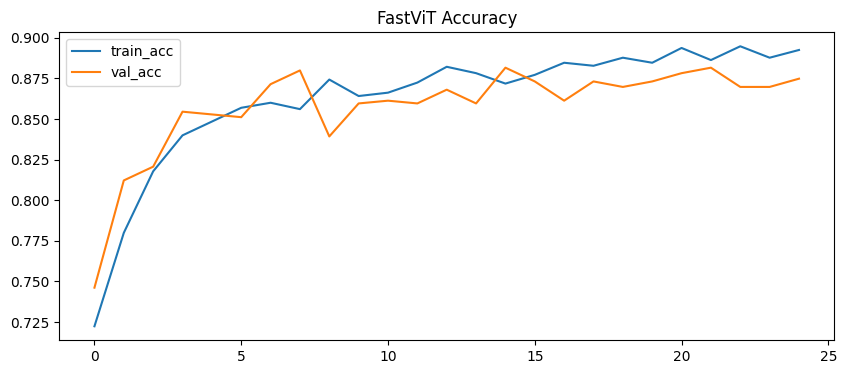

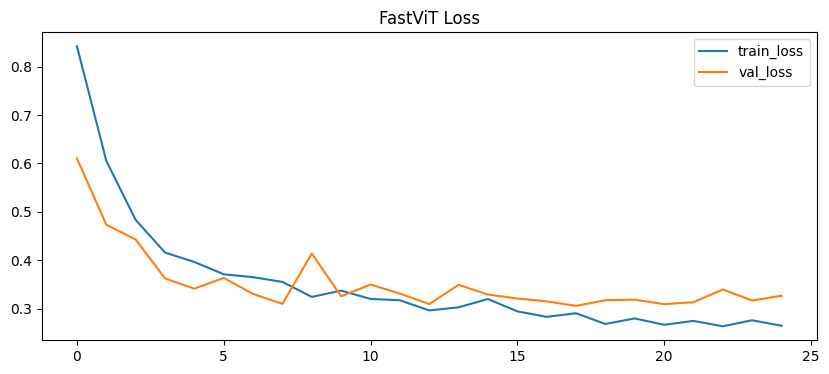

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6, 222)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6, 64)          │        14,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 6, 64)          │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 6, 64)          │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,002 (726.57 KB)

 Trainable params: 186,002 (726.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6501 - loss: 1.1147 - val_accuracy: 0.7614 - val_loss: 0.6495
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7787 - loss: 0.6098 - val_accuracy: 0.8071 - val_loss: 0.5034
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8016 - loss: 0.5263 - val_accuracy: 0.8020 - val_loss: 0.5148
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8277 - loss: 0.4490 - val_accuracy: 0.8342 - val_loss: 0.4181
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8289 - loss: 0.4591 - val_accuracy: 0.8409 - val_loss: 0.3854
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8425 - loss: 0.3918 - val_accuracy: 0.8443 - val_loss: 0.3783
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8413 - loss: 0.4168 - val_accuracy: 0.8562 - val_loss: 0.3676
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8482 - loss: 0.3853 - val_

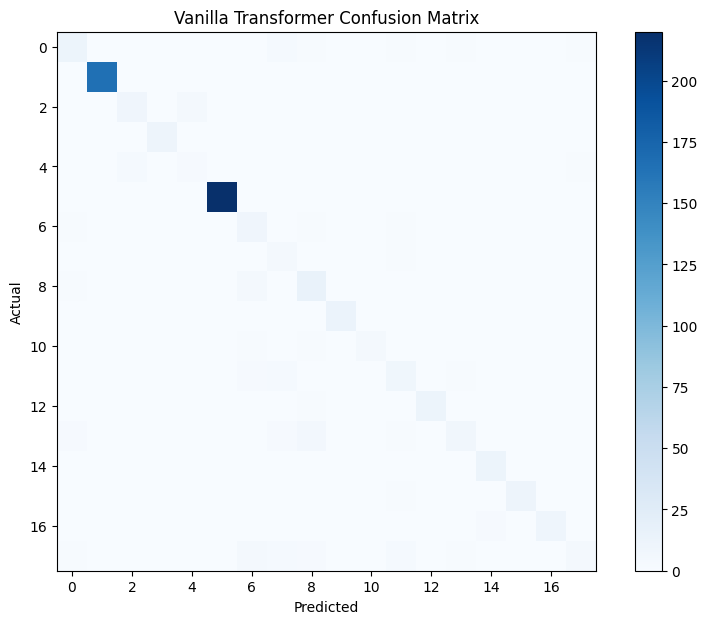

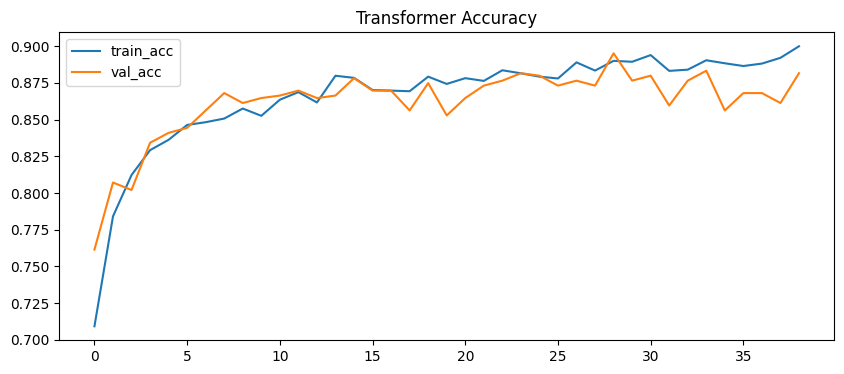

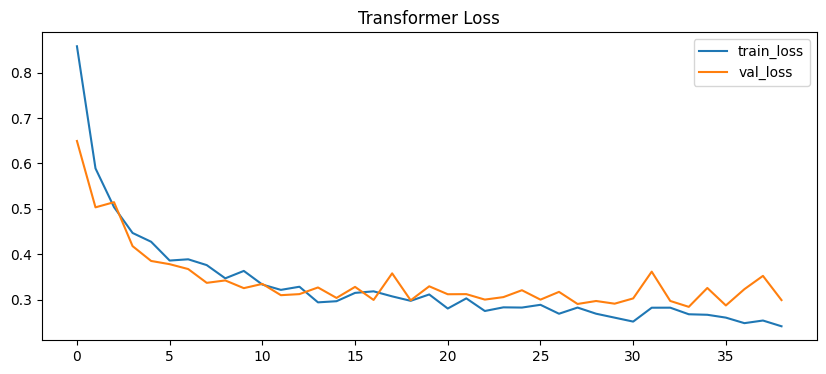

📂 Saved: FastViT + Transformer models, results, confusion matrices, plots


In [6]:
# -----------------------
# FastViT Block
# -----------------------
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def build_fastvit(window, n_features, n_classes, projection_dim=64, transformer_layers=2, num_heads=4):
    inputs = layers.Input(shape=(window, n_features))

    # Linear patch embedding (like ViT patches)
    x = layers.Dense(projection_dim)(inputs)

    # Transformer encoder blocks
    for _ in range(transformer_layers):
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x, x)
        x = layers.Add()([x, attention_output])
        x = layers.LayerNormalization()(x)

        # Feed-forward network
        mlp_output = mlp(x, hidden_units=[projection_dim * 2, projection_dim], dropout_rate=0.3)
        x = layers.Add()([x, mlp_output])
        x = layers.LayerNormalization()(x)

    # Classification head
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


fastvit_model = build_fastvit(X_train.shape[1], X_train.shape[2], len(classes))
fastvit_model.summary()

# Train
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
history_fastvit = fastvit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict & Evaluate
y_val_pred = fastvit_model.predict(X_val).argmax(axis=1)
acc_fastvit = accuracy_score(y_val, y_val_pred)
f1_fastvit = f1_score(y_val, y_val_pred, average="macro")
print("\n✅ FastViT Results")
print("Accuracy:", acc_fastvit)
print("Macro-F1:", f1_fastvit)
print(classification_report(y_val, y_val_pred, target_names=classes, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap="Purples")
plt.title("FastViT Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# Training curves
plt.figure(figsize=(10, 4))
plt.plot(history_fastvit.history["accuracy"], label="train_acc")
plt.plot(history_fastvit.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("FastViT Accuracy"); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history_fastvit.history["loss"], label="train_loss")
plt.plot(history_fastvit.history["val_loss"], label="val_loss")
plt.legend(); plt.title("FastViT Loss"); plt.show()

# Save
fastvit_model.save("fastvit_model.h5")
results_fastvit = {
    "accuracy": float(acc_fastvit),
    "macro_f1": float(f1_fastvit),
    "confusion_matrix": cm.tolist()
}
with open("results_fastvit.json", "w") as f:
    json.dump(results_fastvit, f, indent=4)


# ================================================================
# Vanilla Transformer (Time Series Transformer)
# ================================================================
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = models.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_transformer(window, n_features, n_classes, embed_dim=64, num_heads=4, ff_dim=128, num_blocks=2):
    inputs = layers.Input(shape=(window, n_features))
    x = layers.Dense(embed_dim)(inputs)

    for _ in range(num_blocks):
        x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


transformer_model = build_transformer(X_train.shape[1], X_train.shape[2], len(classes))
transformer_model.summary()

# Train
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
history_trans = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict & Evaluate
y_val_pred = transformer_model.predict(X_val).argmax(axis=1)
acc_trans = accuracy_score(y_val, y_val_pred)
f1_trans = f1_score(y_val, y_val_pred, average="macro")
print("\n✅ Vanilla Transformer Results")
print("Accuracy:", acc_trans)
print("Macro-F1:", f1_trans)
print(classification_report(y_val, y_val_pred, target_names=classes, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap="Blues")
plt.title("Vanilla Transformer Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# Training curves
plt.figure(figsize=(10, 4))
plt.plot(history_trans.history["accuracy"], label="train_acc")
plt.plot(history_trans.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("Transformer Accuracy"); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history_trans.history["loss"], label="train_loss")
plt.plot(history_trans.history["val_loss"], label="val_loss")
plt.legend(); plt.title("Transformer Loss"); plt.show()

# Save
transformer_model.save("transformer_model.h5")
results_trans = {
    "accuracy": float(acc_trans),
    "macro_f1": float(f1_trans),
    "confusion_matrix": cm.tolist()
}
with open("results_transformer.json", "w") as f:
    json.dump(results_trans, f, indent=4)

print("📂 Saved: FastViT + Transformer models, results, confusion matrices, plots")